In [1]:
cd D:\\Saarbrucken\\EDA_Research\\vae-disentanglement\\disentanglement_lib_pl

D:\Saarbrucken\EDA_Research\vae-disentanglement\disentanglement_lib_pl


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from collections import namedtuple
from matplotlib import cm as mpl_colormaps

import torch
import torchvision.utils as vutils
import torchvision.transforms.functional as T
from torch.utils.data import DataLoader
from torchvision import transforms

from bvae_experiment import BVAEExperiment
from common.data_loader import DSpritesDataset, ThreeShapesDataset, ContinumDataset
from common import notebook_utils 
import models
from gnncsvae_experiment import GNNCSVAEExperiment
from common.utils import CenteredNorm
# Change figure aesthetics
%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})
np.set_printoptions(suppress=True,precision=4)

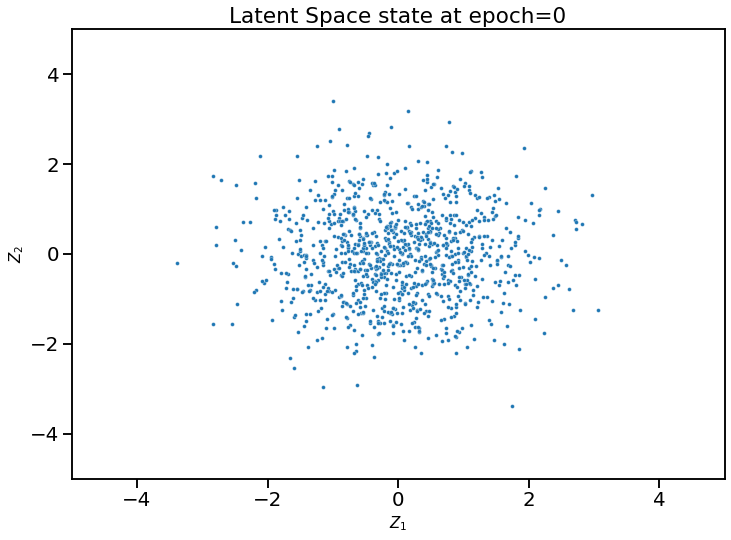

In [11]:
i=0
node_idx = 0
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

hue_factors = ['image_index', 'theta', 'phi', 'shade','mid']

dummy_latents = np.random.randn(1000,2)
# should have same number of entries as latents
# without Hue we will not know the 'dynamics' of latent space. 
# we absolutely need hue to correctly interpret what's going on
# Hue should come from the label of latent we want this node to correspond to, right?
dummy_hue = None

# When latent space is 2D
sns.scatterplot(x=dummy_latents[:,0], y=dummy_latents[:,1], hue=dummy_hue, s=15, ax=ax)
#plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
ax.set_xlabel(r"$Z_1$",fontsize=15)
ax.set_ylabel(r"$Z_2$",fontsize=15)
ax.set(ylim=(-5, 5))
ax.set(xlim=(-5, 5))
plt.title(f"Latent Space state at epoch={i}")
plt.show()
#plt.savefig(f"./track-test/latent_space.{i}.jpg")

#fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
#sns.kdeplot(x=dummy_latents[:,0],y=dummy_latents[:,1], hue=dummy_hue, fill=True)

In [6]:
?np.random.randn

[]

In [15]:
z=3
assert z == 2, f"_save_2D_latent_space_plot() expects 2D latent space and you have {z}D"

AssertionError: _save_2D_latent_space_plot() expects 2D latent space and you have 3d